In [70]:
%pip install imblearn

  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, recall_score, fbeta_score, precision_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import make_scorer

In [20]:
#Reading the final Data - feature engineered
data = pd.read_csv("E:/Powerco-BCG/engineered_data.csv")
data = data.drop(columns=['Unnamed: 0'])

In [21]:
data.head()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,offpeak_diff_dec_january_power,feat_0_var,feat_10_var,feat_11_var,feat_2_var,comb_effect,year_acitv,year_end,year_modif,year_renewal
0,4,0.000000,4.739944,0.000000,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,3.700961,73.390146,1.716487,-0.320723,151.748204,0.000000,2013,2016,2015,2015
1,0,3.668479,0.000000,0.000000,2.280920,0.000000,0.0,1.237292,0.145711,0.000000,...,0.177779,-3.254160,-1.602081,-0.186963,-2.250630,-1.462852,2009,2016,2009,2015
2,4,2.736397,0.000000,0.000000,1.689841,0.000000,0.0,1.599009,0.165794,0.087899,...,0.177779,-3.254559,-1.612827,-0.178766,-2.251424,-0.211707,2010,2016,2010,2015
3,5,3.200029,0.000000,0.000000,2.382089,0.000000,0.0,1.318689,0.146694,0.000000,...,0.177779,-3.254559,-1.613678,-0.180230,-2.251425,-0.600204,2010,2016,2010,2015
4,0,3.646011,0.000000,2.721811,2.650065,2.721811,0.0,2.122969,0.116900,0.100015,...,0.162916,-3.251533,-1.614405,-0.181494,-2.251423,0.973692,2010,2016,2010,2015


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   channel_sales                    14606 non-null  int64  
 1   cons_12m                         14606 non-null  float64
 2   cons_gas_12m                     14606 non-null  float64
 3   cons_last_month                  14606 non-null  float64
 4   forecast_cons_12m                14606 non-null  float64
 5   forecast_cons_year               14606 non-null  float64
 6   forecast_discount_energy         14606 non-null  float64
 7   forecast_meter_rent_12m          14606 non-null  float64
 8   forecast_price_energy_off_peak   14606 non-null  float64
 9   forecast_price_energy_peak       14606 non-null  float64
 10  forecast_price_pow_off_peak      14606 non-null  float64
 11  has_gas                          14606 non-null  int64  
 12  imp_cons          

In [23]:
#Creating the X and y split as features and target respectively
X = data.drop(columns=['churn'])
y=data['churn']

#Rectifying the imbalance using SMOTE technique
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [24]:
#Splitting the dataset (x,y) into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101, stratify=y)


In [25]:
%%time
#Creating a random forest calssifier
clf = RandomForestClassifier(random_state=101, n_jobs=-1, max_depth=None, n_estimators=300, oob_score=True)
clf.fit(X_train, y_train)
#out of bag score
clf.oob_score_

CPU times: total: 1min
Wall time: 7.22 s


RandomForestClassifier(n_estimators=300, n_jobs=-1, oob_score=True,
                       random_state=101)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3956
           1       0.98      0.91      0.95      3957

    accuracy                           0.95      7913
   macro avg       0.95      0.95      0.95      7913
weighted avg       0.95      0.95      0.95      7913



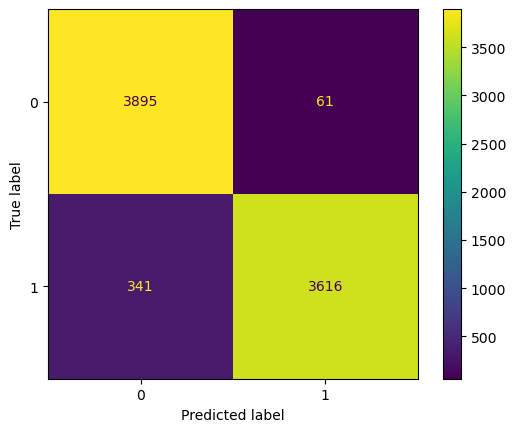

In [27]:
#Predicting the text dataset
y_pred = clf.predict(X_test)

#visualising the confusion matric display
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test,y_pred))

In [28]:
#calculating the f2_score using the f-beta score
print(fbeta_score(y_test, y_pred, beta=2.0))

0.926941809792361


In [29]:
#Cross validation 
scores = cross_val_score(clf, X, y, cv=10)
print(scores)

[0.61637604 0.96285064 0.99203942 0.99052312 0.99165719 0.98824422
 0.9939325  0.99051953 0.99127797 0.98634812]


In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Defining a customer scorer evaluation for the cross_val_score
def f2_scorer(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

# Make scorer object using the custom scorer
f2_scorer_obj = make_scorer(f2_scorer)

scores = cross_val_score(clf, X, y, cv=cv, n_jobs=-1,scoring=f2_scorer_obj)


In [35]:
print("Scores across all folds\n:",scores)
print("Average score across all folds: ",scores.mean())

Scores across all folds
: [0.92792238 0.94157338 0.93062606 0.93783576 0.93500307 0.94013814
 0.93351758 0.93173432 0.92869244 0.92965984 0.92826355 0.92692308
 0.93360996 0.93548387 0.9229584  0.93870026 0.93360996 0.93826781
 0.93466564 0.93404908 0.94464039 0.93116165 0.92797784 0.93615715
 0.93371183 0.92569755 0.92244961 0.92392978 0.9332205  0.94186225]
Average score across all folds:  0.9328014373552621


1. Why did you choose the evaluation metrics that you used? Please elaborate on your choices?<br>
**Answer** :Our main aim is to target customers who are planning to churn and get them to stay using some speacial incentive. So we need to make sure that we all the customers who will churn needs to be captured with utmost confidence. Inorder to measure this, we use F2_score which gives more importance to recall (TP/(TP+FN)), out of all the churned customers, how much did we predict correctly. 

2. Do you think that the model performance is satisfactory? Give justification for your answer.<br>
**Answer** :We have a f2_score of 93% which is a good classification score compared to average but this can still be improved using more advanced feature engineering techniques, advanced models(XGBoost, CatBoost etc.), 


### Creating feature importance

In [46]:
importances = clf.feature_importances_
feature_names = clf.feature_names_in_
forest_importance = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

Text(0, 0.5, 'Mean decrease in impurity')

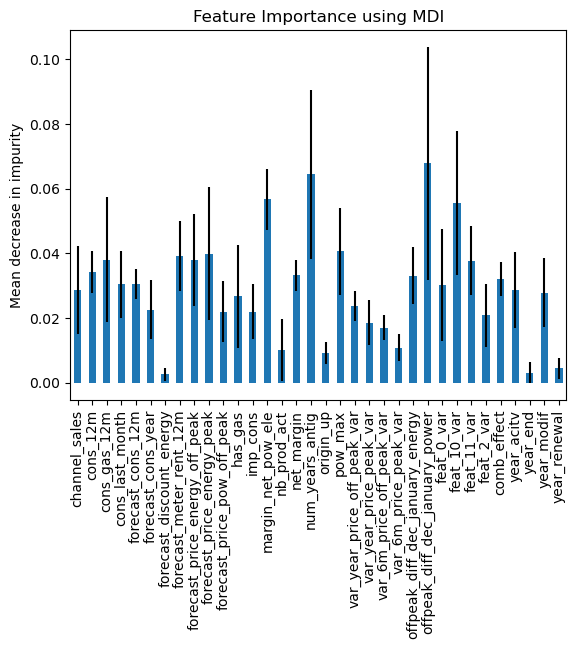

In [47]:
fig,ax = plt.subplots()
forest_importance.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature Importance using MDI")
ax.set_ylabel("Mean decrease in impurity")